# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.



In [454]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [455]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [456]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [457]:
New_merged_df = pd.merge(study_results,mouse_metadata,how = 'left',on = ["Mouse ID"])
New_merged_df.head(5)




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [458]:
# Number of mice.
Unique_mice = New_merged_df['Mouse ID'].nunique()
Unique_mice

249

In [459]:
# Duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_miceID = New_merged_df[New_merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
DM = Duplicate_miceID['Mouse ID'].unique()
DM

array(['g989'], dtype=object)

In [460]:
# All the data for the duplicate mouse ID. 
New_merged_df[New_merged_df['Mouse ID']== 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [461]:
#cleaned DataFrame by dropping the duplicate mouse by its ID.
#New_merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], Keep='first')

Clean_df= New_merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
Clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [462]:
# Checking the number of mice in the clean DataFrame.
Number_of_mice = Clean_df['Mouse ID'].nunique()

Number_of_mice

249

## Summary Statistics

In [464]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Used groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assembled the resulting series into a single summary DataFrame.


Clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem']).rename(columns = {'mean':'Mean Tumor Volume'
                                                                                                                   ,'median': 'Median Tumor Volume'
                                                                                                                   ,'var': 'Tumor Volume Variance'
                                                                                                                   ,'std': 'Tumor Volume Std. Dev.'
                                                                                                                   ,'sem': 'Tumor Volume Std.Err.'})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [465]:
# Generated a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).aggregate(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

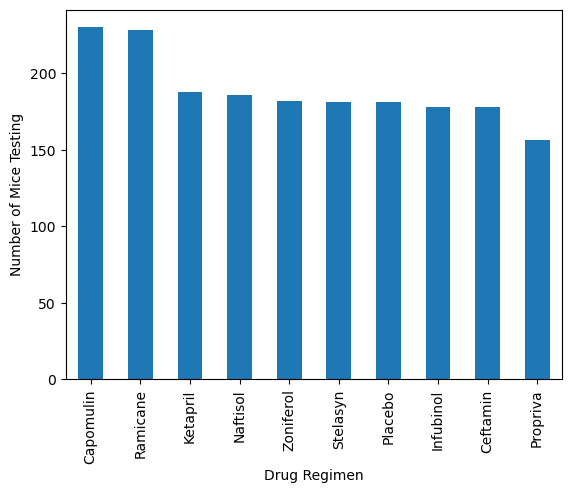

In [466]:
# a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
%matplotlib inline
import matplotlib.pyplot as plt

Clean_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Testing')
plt.show()

In [467]:
# Generated a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import plotly.express as px
PDF = Clean_df.groupby(['Drug Regimen']).count().reset_index()
PDF = PDF.sort_values(by = ['Mouse ID'],ascending = False)

fig = px.bar(PDF,x="Drug Regimen",y= "Mouse ID")
fig.show()

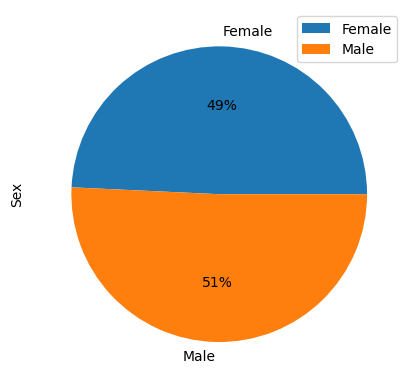

In [468]:
# Generated a pie plot showing the distribution of female versus male mice using Pandas
Clean_df.groupby(['Sex']).count().plot(kind='pie',y='Mouse ID',autopct='%1.0f%%',ylabel = 'Sex')
plt.show()

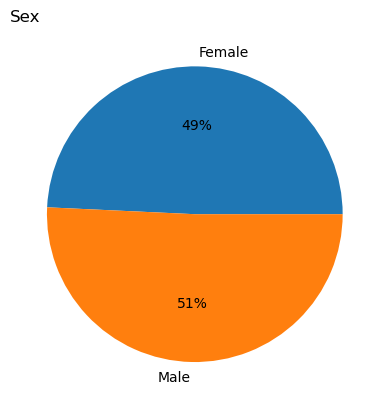

In [469]:
# Generated a pie plot showing the distribution of female versus male mice using pyplot
pidf = Clean_df.groupby(['Sex']).count().reset_index()
y = pidf['Mouse ID'].tolist()
pielb = pidf['Sex'].tolist()
plt.pie(y,labels = pielb,autopct='%1.0f%%')
plt.title('Sex', loc= 'left')
plt.show()

## Quartiles, Outliers and Boxplots

In [470]:
# the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Starte by getting the last (greatest) timepoint for each mouse


# Merged this group df with the original DataFrame to get the tumor volume at the last timepoint

treatment_df = Clean_df[(Clean_df['Drug Regimen']== 'Capomulin') | (Clean_df['Drug Regimen']== 'Ramicane')|(Clean_df['Drug Regimen']== 'Infubinol')
        |(Clean_df['Drug Regimen']== 'Ceftamin')]

treatment_df.sort_values(by = ['Mouse ID','Timepoint'],ascending=True,inplace=True )
treatment_df_unique = treatment_df.drop_duplicates(subset = ['Mouse ID'], keep ='last').reset_index(drop = True)
treatment_df_unique = treatment_df_unique[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
treatment_df_final = pd.merge(treatment_df,treatment_df_unique,how = 'left',on = ['Mouse ID'])
treatment_df_final                                


C:\Users\samit\AppData\Local\Temp\ipykernel_22832\319374687.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Tumor Volume (mm3)_y
0,a203,0,45.000000,0,Infubinol,Female,20,23,Infubinol,67.973419
1,a203,5,48.508468,0,Infubinol,Female,20,23,Infubinol,67.973419
2,a203,10,51.852437,1,Infubinol,Female,20,23,Infubinol,67.973419
3,a203,15,52.777870,1,Infubinol,Female,20,23,Infubinol,67.973419
4,a203,20,55.173336,1,Infubinol,Female,20,23,Infubinol,67.973419
...,...,...,...,...,...,...,...,...,...,...
809,z581,25,54.316407,2,Infubinol,Female,24,25,Infubinol,62.754451
810,z581,30,56.286750,2,Infubinol,Female,24,25,Infubinol,62.754451
811,z581,35,58.628399,3,Infubinol,Female,24,25,Infubinol,62.754451
812,z581,40,60.053740,3,Infubinol,Female,24,25,Infubinol,62.754451


In [483]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = treatment_df_final.groupby(['Drug Regimen_x']).count().reset_index()['Drug Regimen_x'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = list()

treatment_list

    

  

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [484]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for x in treatment_list:
    Treatment_dataset = treatment_df_unique[treatment_df_unique['Drug Regimen']== x]
    Q1 = Treatment_dataset['Tumor Volume (mm3)'].quantile(q=.25)
    Q3 = Treatment_dataset['Tumor Volume (mm3)'].quantile(q=.75)
    IQR = Q3-Q1  
    outlier = Treatment_dataset.loc[(Treatment_dataset['Tumor Volume (mm3)'] < Q1-1.25*IQR) 
                                | (Treatment_dataset['Tumor Volume (mm3)'] > Q3+1.25*IQR)]['Tumor Volume (mm3)']
    print(x + "'s potential outlier : ",outlier)


Capomulin's potential outlier :  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outlier :  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier :  15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outlier :  Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0.98, '')

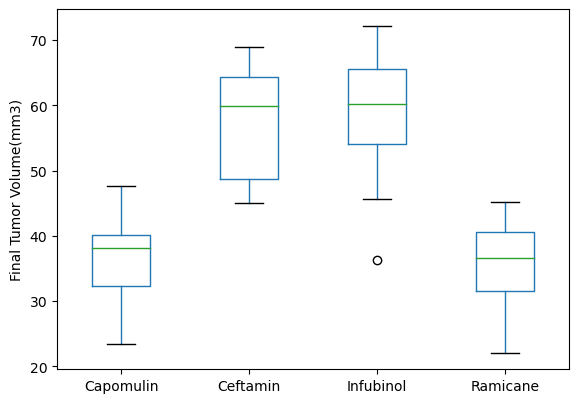

In [515]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_df_unique.boxplot(column = ['Tumor Volume (mm3)'],by ='Drug Regimen',grid = False,).set_ylabel('Final Tumor Volume(mm3)')
plt.xlabel(xlabel = None)
plt.title("")
plt.suptitle("")


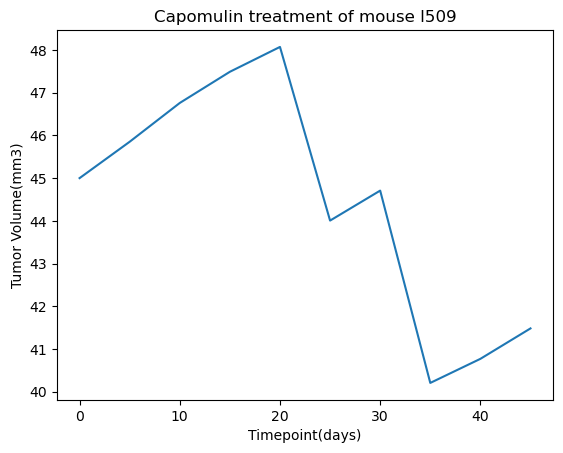

In [547]:
#a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_treatment = treatment_df_final[(treatment_df_final['Drug Regimen_x'] == 'Capomulin') 
                                     & (treatment_df_final['Mouse ID']== 'l509')][['Timepoint','Tumor Volume (mm3)_x']]
mouse_treatment.plot(x='Timepoint',y='Tumor Volume (mm3)_x',legend = False).set_ylabel('Tumor Volume(mm3)')
plt.xlabel("Timepoint(days)")
plt.title("Capomulin treatment of mouse l509")
plt.show()



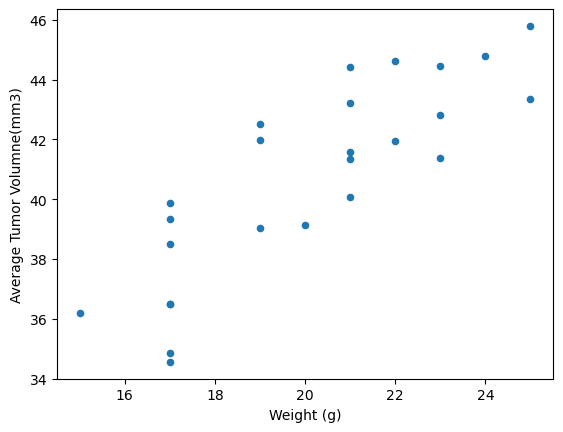

In [578]:
scatter_plot = Clean_df[Clean_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID','Weight (g)']).mean().reset_index()
scatter_plot.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)').set_ylabel("Average Tumor Volumne(mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


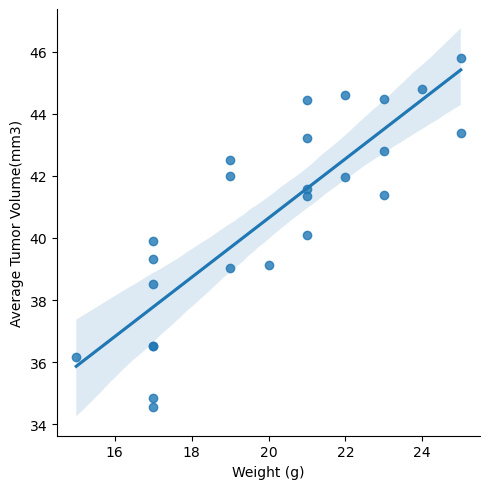

In [580]:
#the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import seaborn as sns
import numpy as np

cof = np.corrcoef(scatter_plot['Weight (g)'], scatter_plot['Tumor Volume (mm3)'])[0][1]

sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)', data=scatter_plot).set_ylabels("Average Tumor Volume(mm3)")
print('The correlation between mouse weight and the average tumor volume is ' ,round(cof,2))
plt.show()
